In [2]:
import pandas as pd # to use or generate dataframe
import seaborn as sns # for pretty plots
import numpy as np # for matrix manipulation
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import sklearn.cluster as skc

In [3]:
pwd

'C:\\Users\\emper\\OneDrive\\Desktop\\DSTI\\Pratical-Intro-to-Data-Science\\Final-Project\\EDA & Q1-Q4 Python Codes'

In [4]:
%cd C:\\Users\\emper\\OneDrive\\Desktop\\DSTI\\Pratical-Intro-to-Data-Science\\Final-Project

C:\Users\emper\OneDrive\Desktop\DSTI\Pratical-Intro-to-Data-Science\Final-Project


In [8]:
weather_station = pd.read_csv("WS_Master_Data_with_Long_and_Lat_P.csv")

In [10]:
weather_station.head(10)

,year,month,tmax,tmin,af,rain,sun,station,lon,lat,Sun_Data_Source
0,1941,Jan,NaN,NaN,NaN,74.7,NaN,aberporth,-4.57,52.14,Missing
1,1941,Feb,NaN,NaN,NaN,69.1,NaN,aberporth,-4.57,52.14,Missing
2,1941,Mar,NaN,NaN,NaN,76.2,NaN,aberporth,-4.57,52.14,Missing
3,1941,Apr,NaN,NaN,NaN,33.7,NaN,aberporth,-4.57,52.14,Missing
4,1941,May,NaN,NaN,NaN,51.3,NaN,aberporth,-4.57,52.14,Missing
5,1941,Jun,NaN,NaN,NaN,25.7,NaN,aberporth,-4.57,52.14,Missing
6,1941,Jul,NaN,NaN,NaN,53.9,NaN,aberporth,-4.57,52.14,Missing
7,1941,Aug,NaN,NaN,NaN,91.8,NaN,aberporth,-4.57,52.14,Missing
8,1941,Sep,NaN,NaN,NaN,25.5,NaN,aberporth,-4.57,52.14,Missing
9,1941,Oct,NaN,NaN,NaN,106.2,NaN,aberporth,-4.57,52.14,Missing


In [12]:
weather_station.tail(10)

,year,month,tmax,tmin,af,rain,sun,station,lon,lat,Sun_Data_Source
39173,2023,Mar,11.0,4.8,2.0,113.2,55.7,yeovilton,-2.64,51.006,Kipp & Zonen
39174,2023,Apr,13.7,4.6,4.0,59.6,137.3,yeovilton,-2.64,51.006,Kipp & Zonen
39175,2023,May,18.5,7.5,0.0,68.4,231.1,yeovilton,-2.64,51.006,Kipp & Zonen
39176,2023,Jun,23.4,12.0,0.0,22.8,254.9,yeovilton,-2.64,51.006,Kipp & Zonen
39177,2023,Jul,20.7,12.9,0.0,96.0,132.5,yeovilton,-2.64,51.006,Kipp & Zonen
39178,2023,Aug,21.4,12.4,0.0,56.8,130,yeovilton,-2.64,51.006,Kipp & Zonen
39179,2023,Sep,22.3,12.5,0.0,54.6,139,yeovilton,-2.64,51.006,Kipp & Zonen
39180,2023,Oct,17.2,9.2,0.0,115.2,101.6,yeovilton,-2.64,51.006,Kipp & Zonen
39181,2023,Nov,11.9,5.2,4.0,92.8,67.7,yeovilton,-2.64,51.006,Kipp & Zonen
39182,2023,Dec,11.3,5.7,5.0,135.0,18.6,yeovilton,-2.64,51.006,Kipp & Zonen


In [14]:
weather_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39183 entries, 0 to 39182
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             39183 non-null  int64  
 1   month            39183 non-null  object 
 2   tmax             38257 non-null  float64
 3   tmin             38283 non-null  float64
 4   af               36858 non-null  float64
 5   rain             38312 non-null  float64
 6   sun              30145 non-null  object 
 7   station          39183 non-null  object 
 8   lon              39183 non-null  float64
 9   lat              39183 non-null  float64
 10  Sun_Data_Source  39183 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 3.3+ MB


**Let's remove the last 5 rows as suggested in the question**

In [17]:
Classification_data = weather_station.iloc[:-5, :]

In [19]:
Classification_data.tail(5)

,year,month,tmax,tmin,af,rain,sun,station,lon,lat,Sun_Data_Source
39173,2023,Mar,11.0,4.8,2.0,113.2,55.7,yeovilton,-2.64,51.006,Kipp & Zonen
39174,2023,Apr,13.7,4.6,4.0,59.6,137.3,yeovilton,-2.64,51.006,Kipp & Zonen
39175,2023,May,18.5,7.5,0.0,68.4,231.1,yeovilton,-2.64,51.006,Kipp & Zonen
39176,2023,Jun,23.4,12.0,0.0,22.8,254.9,yeovilton,-2.64,51.006,Kipp & Zonen
39177,2023,Jul,20.7,12.9,0.0,96.0,132.5,yeovilton,-2.64,51.006,Kipp & Zonen


In [21]:
Classification_data.describe()

,year,tmax,tmin,af,rain,lon,lat
count,39178.000000,38252.000000,38278.000000,36853.000000,38307.000000,39178.000000,39178.000000
mean,1971.018709,12.795072,5.979461,3.465227,73.222421,-2.731432,53.952288
std,37.414090,5.050055,4.071011,5.166275,48.530116,2.215899,2.506064
min,1853.000000,-0.900000,-8.600000,0.000000,0.000000,-6.880000,50.218000
25%,1951.000000,8.600000,2.700000,0.000000,39.200000,-4.430000,51.761000
50%,1978.000000,12.400000,5.600000,1.000000,62.800000,-2.640000,53.381000
75%,2000.000000,16.900000,9.500000,5.000000,95.500000,-1.260000,55.312000
max,2023.000000,28.300000,17.000000,31.000000,568.800000,1.727000,60.139000


In [23]:
Classification_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39178 entries, 0 to 39177
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             39178 non-null  int64  
 1   month            39178 non-null  object 
 2   tmax             38252 non-null  float64
 3   tmin             38278 non-null  float64
 4   af               36853 non-null  float64
 5   rain             38307 non-null  float64
 6   sun              30140 non-null  object 
 7   station          39178 non-null  object 
 8   lon              39178 non-null  float64
 9   lat              39178 non-null  float64
 10  Sun_Data_Source  39178 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 3.3+ MB


**Let's drop all the missing values**

Dropping the missing values serves as a purposive sampling for the classification data which ensures that only rows with full data points are used

In [27]:
Classification_data = Classification_data.dropna()
Classification_data

,year,month,tmax,tmin,af,rain,sun,station,lon,lat,Sun_Data_Source
192,1957,Jan,8.6,3.9,2.0,80.6,55.6,aberporth,-4.57,52.140,Campbell Stokes
193,1957,Feb,8.5,3.2,2.0,85.1,105.2,aberporth,-4.57,52.140,Campbell Stokes
194,1957,Mar,12.2,7.4,0.0,83.1,98.3,aberporth,-4.57,52.140,Campbell Stokes
195,1957,Apr,11.3,6.2,0.0,7.4,181.1,aberporth,-4.57,52.140,Campbell Stokes
196,1957,May,13.6,7.4,0.0,54.1,268.7,aberporth,-4.57,52.140,Campbell Stokes
...,...,...,...,...,...,...,...,...,...,...,...
39173,2023,Mar,11.0,4.8,2.0,113.2,55.7,yeovilton,-2.64,51.006,Kipp & Zonen
39174,2023,Apr,13.7,4.6,4.0,59.6,137.3,yeovilton,-2.64,51.006,Kipp & Zonen
39175,2023,May,18.5,7.5,0.0,68.4,231.1,yeovilton,-2.64,51.006,Kipp & Zonen
39176,2023,Jun,23.4,12.0,0.0,22.8,254.9,yeovilton,-2.64,51.006,Kipp & Zonen


In [29]:
Classification_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28154 entries, 192 to 39177
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             28154 non-null  int64  
 1   month            28154 non-null  object 
 2   tmax             28154 non-null  float64
 3   tmin             28154 non-null  float64
 4   af               28154 non-null  float64
 5   rain             28154 non-null  float64
 6   sun              28154 non-null  object 
 7   station          28154 non-null  object 
 8   lon              28154 non-null  float64
 9   lat              28154 non-null  float64
 10  Sun_Data_Source  28154 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.6+ MB


In [31]:
Classification_data['sun'] = pd.to_numeric(Classification_data['sun'], errors= 'coerce')

In [33]:
Classification_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28154 entries, 192 to 39177
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             28154 non-null  int64  
 1   month            28154 non-null  object 
 2   tmax             28154 non-null  float64
 3   tmin             28154 non-null  float64
 4   af               28154 non-null  float64
 5   rain             28154 non-null  float64
 6   sun              27880 non-null  float64
 7   station          28154 non-null  object 
 8   lon              28154 non-null  float64
 9   lat              28154 non-null  float64
 10  Sun_Data_Source  28154 non-null  object 
dtypes: float64(7), int64(1), object(3)
memory usage: 2.6+ MB


**Let's create a region mapping to provide a geographical context for the dataset**

In [36]:
# Creating a region mapping for the listed UK weather stations

region_map = {
    "aberporth": "Wales",
    "armagh": "Northern Ireland",
    "ballypatrick": "Northern Ireland",
    "bradford": "Yorkshire and the Humber",
    "braemar": "Scotland",
    "camborne": "South West England",
    "cambridge": "East of England",
    "cardiff": "Wales",
    "chivenor": "South West England",
    "cwmystwyth": "Wales",
    "dunstaffnage": "Scotland",
    "durham": "North East England",
    "eastbourne": "South East England",
    "eskdalemuir": "Scotland",
    "heathrow": "South East England",
    "hurn": "South West England",
    "lerwick": "Scotland",
    "leuchars": "Scotland",
    "lowestoft": "East of England",
    "manston": "South East England",
    "nairn": "Scotland",
    "newtonrigg": "North West England",
    "oxford": "South East England",
    "paisley": "Scotland",
    "ringway": "North West England",
    "rossonwye": "West Midlands",
    "shawbury": "West Midlands",
    "sheffield": "Yorkshire and the Humber",
    "southampton": "South East England",
    "stornoway": "Scotland",
    "suttonbonington": "East Midlands",
    "tiree": "Scotland",
    "valley": "Wales",
    "waddington": "East Midlands",
    "whitby": "Yorkshire and the Humber",
    "wickairport": "Scotland",
    "yeovilton": "South West England"
}

region_map  # Display the region mapping



{'aberporth': 'Wales',
 'armagh': 'Northern Ireland',
 'ballypatrick': 'Northern Ireland',
 'bradford': 'Yorkshire and the Humber',
 'braemar': 'Scotland',
 'camborne': 'South West England',
 'cambridge': 'East of England',
 'cardiff': 'Wales',
 'chivenor': 'South West England',
 'cwmystwyth': 'Wales',
 'dunstaffnage': 'Scotland',
 'durham': 'North East England',
 'eastbourne': 'South East England',
 'eskdalemuir': 'Scotland',
 'heathrow': 'South East England',
 'hurn': 'South West England',
 'lerwick': 'Scotland',
 'leuchars': 'Scotland',
 'lowestoft': 'East of England',
 'manston': 'South East England',
 'nairn': 'Scotland',
 'newtonrigg': 'North West England',
 'oxford': 'South East England',
 'paisley': 'Scotland',
 'ringway': 'North West England',
 'rossonwye': 'West Midlands',
 'shawbury': 'West Midlands',
 'sheffield': 'Yorkshire and the Humber',
 'southampton': 'South East England',
 'stornoway': 'Scotland',
 'suttonbonington': 'East Midlands',
 'tiree': 'Scotland',
 'valley': 

In [38]:
# Mapping from station to region
station_to_region = {
    'aberporth': 'Wales',
    'armagh': 'Northern Ireland',
    'ballypatrick': 'Northern Ireland',
    'bradford': 'Yorkshire and the Humber',
    'braemar': 'Scotland',
    'camborne': 'South West England',
    'cambridge': 'East of England',
    'cardiff': 'Wales',
    'chivenor': 'South West England',
    'cwmystwyth': 'Wales',
    'dunstaffnage': 'Scotland',
    'durham': 'North East England',
    'eastbourne': 'South East England',
    'eskdalemuir': 'Scotland',
    'heathrow': 'South East England',
    'hurn': 'South West England',
    'lerwick': 'Scotland',
    'leuchars': 'Scotland',
    'lowestoft': 'East of England',
    'manston': 'South East England',
    'nairn': 'Scotland',
    'newtonrigg': 'North West England',
    'oxford': 'South East England',
    'paisley': 'Scotland',
    'ringway': 'North West England',
    'rossonwye': 'West Midlands',
    'shawbury': 'West Midlands',
    'sheffield': 'Yorkshire and the Humber',
    'southampton': 'South East England',
    'stornoway': 'Scotland',
    'suttonbonington': 'East Midlands',
    'tiree': 'Scotland',
    'valley': 'Wales',
    'waddington': 'East Midlands',
    'whitby': 'Yorkshire and the Humber',
    'wickairport': 'Scotland',
    'yeovilton': 'South West England'
}

# Add the region column
Classification_data['region'] = Classification_data['station'].map(station_to_region)

# Group by region and show mean values for numeric columns
#grouped_by_region = classification_data.groupby('region').mean(numeric_only=True)

#grouped_by_region.head()


In [40]:
Classification_data

,year,month,tmax,tmin,af,rain,sun,station,lon,lat,Sun_Data_Source,region
192,1957,Jan,8.6,3.9,2.0,80.6,55.6,aberporth,-4.57,52.140,Campbell Stokes,Wales
193,1957,Feb,8.5,3.2,2.0,85.1,105.2,aberporth,-4.57,52.140,Campbell Stokes,Wales
194,1957,Mar,12.2,7.4,0.0,83.1,98.3,aberporth,-4.57,52.140,Campbell Stokes,Wales
195,1957,Apr,11.3,6.2,0.0,7.4,181.1,aberporth,-4.57,52.140,Campbell Stokes,Wales
196,1957,May,13.6,7.4,0.0,54.1,268.7,aberporth,-4.57,52.140,Campbell Stokes,Wales
...,...,...,...,...,...,...,...,...,...,...,...,...
39173,2023,Mar,11.0,4.8,2.0,113.2,55.7,yeovilton,-2.64,51.006,Kipp & Zonen,South West England
39174,2023,Apr,13.7,4.6,4.0,59.6,137.3,yeovilton,-2.64,51.006,Kipp & Zonen,South West England
39175,2023,May,18.5,7.5,0.0,68.4,231.1,yeovilton,-2.64,51.006,Kipp & Zonen,South West England
39176,2023,Jun,23.4,12.0,0.0,22.8,254.9,yeovilton,-2.64,51.006,Kipp & Zonen,South West England


**Let's download this file**

In [43]:
# Save the DataFrame as a CSV file in the current working directory
#Classification_data.to_csv("Classification_data.csv", index=False)

#print("File saved as Classification_data.csv in the current working directory.")


**To take care of the effect of extreme values associated with tmax and tmin, let's use the average value of the temp**

In [46]:
Classification_data["AvgTemp"] = (Classification_data["tmax"]+Classification_data["tmin"])/2
Classification_data

,year,month,tmax,tmin,af,rain,sun,station,lon,lat,Sun_Data_Source,region,AvgTemp
192,1957,Jan,8.6,3.9,2.0,80.6,55.6,aberporth,-4.57,52.140,Campbell Stokes,Wales,6.25
193,1957,Feb,8.5,3.2,2.0,85.1,105.2,aberporth,-4.57,52.140,Campbell Stokes,Wales,5.85
194,1957,Mar,12.2,7.4,0.0,83.1,98.3,aberporth,-4.57,52.140,Campbell Stokes,Wales,9.80
195,1957,Apr,11.3,6.2,0.0,7.4,181.1,aberporth,-4.57,52.140,Campbell Stokes,Wales,8.75
196,1957,May,13.6,7.4,0.0,54.1,268.7,aberporth,-4.57,52.140,Campbell Stokes,Wales,10.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39173,2023,Mar,11.0,4.8,2.0,113.2,55.7,yeovilton,-2.64,51.006,Kipp & Zonen,South West England,7.90
39174,2023,Apr,13.7,4.6,4.0,59.6,137.3,yeovilton,-2.64,51.006,Kipp & Zonen,South West England,9.15
39175,2023,May,18.5,7.5,0.0,68.4,231.1,yeovilton,-2.64,51.006,Kipp & Zonen,South West England,13.00
39176,2023,Jun,23.4,12.0,0.0,22.8,254.9,yeovilton,-2.64,51.006,Kipp & Zonen,South West England,17.70


In [48]:
Classification_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28154 entries, 192 to 39177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             28154 non-null  int64  
 1   month            28154 non-null  object 
 2   tmax             28154 non-null  float64
 3   tmin             28154 non-null  float64
 4   af               28154 non-null  float64
 5   rain             28154 non-null  float64
 6   sun              27880 non-null  float64
 7   station          28154 non-null  object 
 8   lon              28154 non-null  float64
 9   lat              28154 non-null  float64
 10  Sun_Data_Source  28154 non-null  object 
 11  region           28154 non-null  object 
 12  AvgTemp          28154 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 3.0+ MB


In [50]:
Classification_data.describe()

,year,tmax,tmin,af,rain,sun,lon,lat,AvgTemp
count,28154.000000,28154.000000,28154.00000,28154.000000,28154.000000,27880.000000,28154.000000,28154.000000,28154.000000
mean,1979.320345,12.838975,6.07085,3.431306,72.044807,118.450276,-2.583117,53.974852,9.454912
std,27.199292,5.057003,4.09649,5.176972,48.048325,63.196272,2.173804,2.542231,4.509328
min,1890.000000,-0.900000,-8.60000,0.000000,0.000000,2.800000,-6.880000,50.218000,-4.650000
25%,1962.000000,8.600000,2.80000,0.000000,38.400000,64.800000,-3.820000,51.911000,5.750000
50%,1982.000000,12.500000,5.70000,0.000000,61.700000,111.950000,-2.270000,53.356000,9.050000
75%,2000.000000,17.000000,9.60000,5.000000,94.000000,163.600000,-1.260000,55.846000,13.300000
max,2023.000000,28.300000,17.00000,31.000000,568.800000,350.300000,1.727000,60.139000,22.450000


In [52]:
model_feature_columns = ["station","year","month", "AvgTemp", "af", "rain", "sun", "lat", "lon", "region"]

In [54]:
Model_Classification_data = Classification_data[model_feature_columns]
Model_Classification_data

,station,year,month,AvgTemp,af,rain,sun,lat,lon,region
192,aberporth,1957,Jan,6.25,2.0,80.6,55.6,52.140,-4.57,Wales
193,aberporth,1957,Feb,5.85,2.0,85.1,105.2,52.140,-4.57,Wales
194,aberporth,1957,Mar,9.80,0.0,83.1,98.3,52.140,-4.57,Wales
195,aberporth,1957,Apr,8.75,0.0,7.4,181.1,52.140,-4.57,Wales
196,aberporth,1957,May,10.50,0.0,54.1,268.7,52.140,-4.57,Wales
...,...,...,...,...,...,...,...,...,...,...
39173,yeovilton,2023,Mar,7.90,2.0,113.2,55.7,51.006,-2.64,South West England
39174,yeovilton,2023,Apr,9.15,4.0,59.6,137.3,51.006,-2.64,South West England
39175,yeovilton,2023,May,13.00,0.0,68.4,231.1,51.006,-2.64,South West England
39176,yeovilton,2023,Jun,17.70,0.0,22.8,254.9,51.006,-2.64,South West England


In [56]:
Model_Classification_data.to_csv("model_classification.csv", index=False)


In [58]:
Model_Classification_data = pd.read_csv("model_classification.csv")

In [60]:
#Classification_data.groupby('region').mean(numeric_only=True)

**Now, let's run the Random Forest Algorithm**

In [63]:
#First let's load the libraries

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

As stated in the question,

Most northerly point (max) = 60.9

Most southerly point (min) = 49.9

Range = 60.9-49.9 = 11
Since there are 3 region, we divide 11 by 3 = 3.67

60.9 - 3.67 = 57.23 for the northerly central
40.9 + 3.67 = 53.4 for the southerly central

In [68]:
#Then, let's do the labelling usiing latitude
def assign_region(lat):
    if lat >= 56.9:
        return 'Northern Third'
    elif lat >= 53.4:
        return 'Central Third'
    else:
        return 'Southern Third'

Model_Classification_data['Region_Label'] = Model_Classification_data['lat'].apply(assign_region)

In [70]:
# Drop unneeded columns including 'region' and 'latitude'
features = Model_Classification_data.drop(columns=['station', 'year','lat', 'region', 'AvgTemp'])
target = Model_Classification_data['Region_Label']
Model_Classification_data

,station,year,month,AvgTemp,af,rain,sun,lat,lon,region,Region_Label
0,aberporth,1957,Jan,6.25,2.0,80.6,55.6,52.140,-4.57,Wales,Southern Third
1,aberporth,1957,Feb,5.85,2.0,85.1,105.2,52.140,-4.57,Wales,Southern Third
2,aberporth,1957,Mar,9.80,0.0,83.1,98.3,52.140,-4.57,Wales,Southern Third
3,aberporth,1957,Apr,8.75,0.0,7.4,181.1,52.140,-4.57,Wales,Southern Third
4,aberporth,1957,May,10.50,0.0,54.1,268.7,52.140,-4.57,Wales,Southern Third
...,...,...,...,...,...,...,...,...,...,...,...
28149,yeovilton,2023,Mar,7.90,2.0,113.2,55.7,51.006,-2.64,South West England,Southern Third
28150,yeovilton,2023,Apr,9.15,4.0,59.6,137.3,51.006,-2.64,South West England,Southern Third
28151,yeovilton,2023,May,13.00,0.0,68.4,231.1,51.006,-2.64,South West England,Southern Third
28152,yeovilton,2023,Jun,17.70,0.0,22.8,254.9,51.006,-2.64,South West England,Southern Third


In [72]:
Group_by_Label = Model_Classification_data.groupby('Region_Label')
Group_by_Label['station'].count()


Region_Label
Central Third      8347
Northern Third     4446
Southern Third    15361
Name: station, dtype: int64

<Axes: title={'center': 'Distribution of the Station by Region'}, xlabel='Region_Label'>

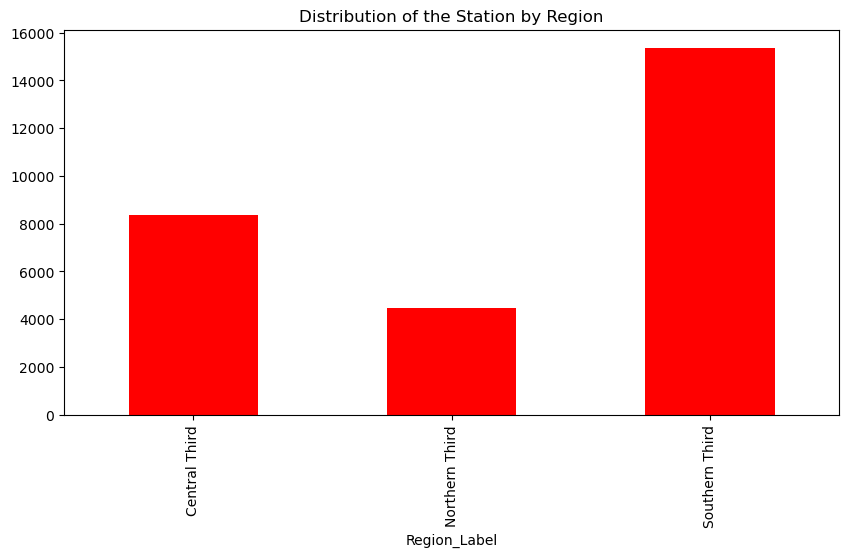

In [74]:
Group_by_Label['station'].count().plot(kind= 'bar', title= 'Distribution of the Station by Region', figsize = (10, 5), color ='red')

In [76]:
# One-hot encode 'month'
categorical_features = ['month']
numeric_features = features.drop(columns=categorical_features).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
    ],
    remainder='passthrough'  # Leave numeric features unchanged
)

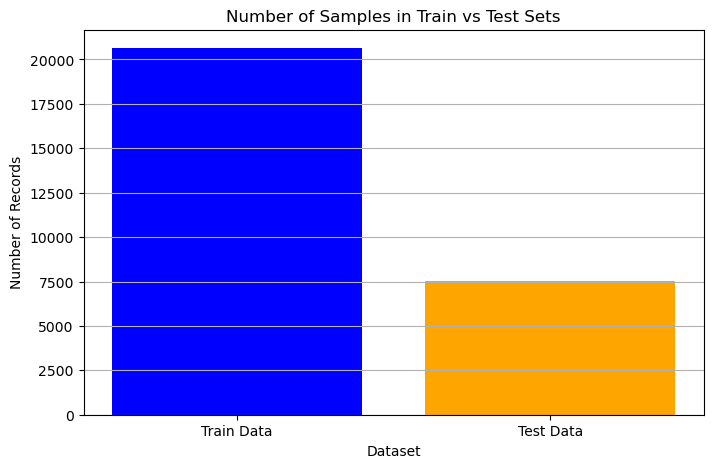

In [78]:
#Let's Map each station to its most common Region_Label (usually one per station)
station_to_region = Model_Classification_data.groupby('station')['Region_Label'].agg(lambda x: x.mode()[0])

#Let's Stratified split of station names based on their region
train_stations, test_stations = train_test_split(
    station_to_region.index,
    test_size=0.3,
    stratify=station_to_region,
    random_state=42
)

#Let's Split the actual data using station names
train_data = Model_Classification_data[Model_Classification_data['station'].isin(train_stations)]
test_data = Model_Classification_data[Model_Classification_data['station'].isin(test_stations)]

# Sizes
train_size = len(train_data)
test_size = len(test_data)

# Plot
plt.figure(figsize=(8, 5))
plt.bar(['Train Data', 'Test Data'], [train_size, test_size], color=['blue', 'orange'])
plt.title('Number of Samples in Train vs Test Sets')
plt.ylabel('Number of Records')
plt.xlabel('Dataset')
plt.grid(axis='y')
plt.show()


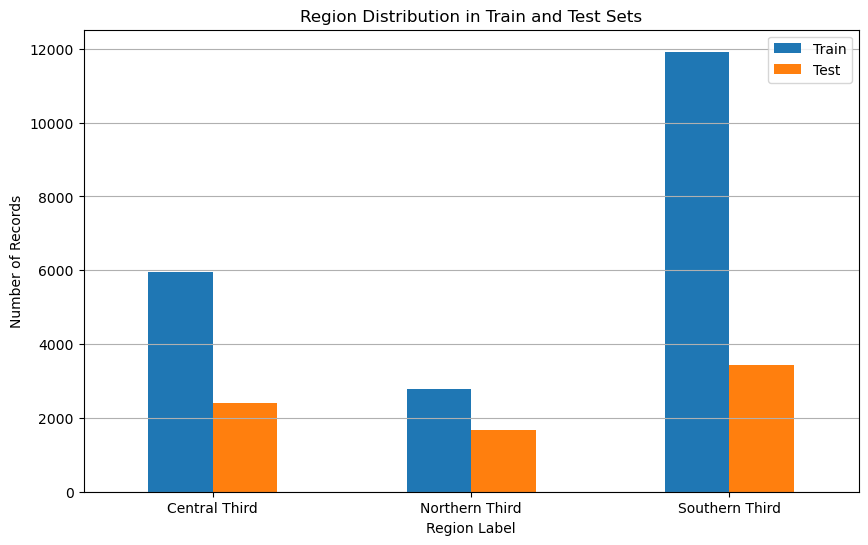

In [80]:
# Count Region_Label values separately in train and test
train_region_counts = train_data['Region_Label'].value_counts().sort_index()
test_region_counts = test_data['Region_Label'].value_counts().sort_index()

# Combine into one DataFrame
region_distribution = pd.DataFrame({
    'Train': train_region_counts,
    'Test': test_region_counts
})

# Plot grouped bar chart
region_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Region Distribution in Train and Test Sets')
plt.xlabel('Region Label')
plt.ylabel('Number of Records')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()

In [82]:
#Let's define features and target
X_train = train_data.drop(columns=['station', 'year', 'lat', 'Region_Label', 'region'])
y_train = train_data['Region_Label']
X_test = test_data.drop(columns=['station', 'year', 'lat', 'Region_Label', 'region'])
y_test = test_data['Region_Label']

In [84]:
#Let's define and train the model pipeline
clf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

clf_pipeline.fit(X_train, y_train)
y_pred = clf_pipeline.predict(X_test)

In [85]:
#Let's set the evaluation metrix
# Evaluation
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

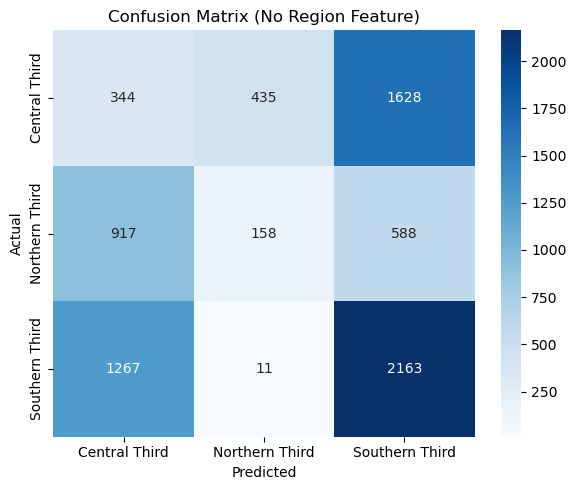

In [86]:
#Let's plot the confusion matrix

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=clf_pipeline.classes_,
            yticklabels=clf_pipeline.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (No Region Feature)')
plt.tight_layout()
plt.savefig("confusion_matrix_no_region.png")

report_df = pd.DataFrame(report).transpose()
report_df_rounded = report_df.round(2)



In [87]:

from IPython.display import display

display(report_df_rounded)


,precision,recall,f1-score,support
Central Third,0.14,0.14,0.14,2407.00
Northern Third,0.26,0.10,0.14,1663.00
Southern Third,0.49,0.63,0.55,3441.00
accuracy,0.35,0.35,0.35,0.35
macro avg,0.30,0.29,0.28,7511.00
weighted avg,0.33,0.35,0.33,7511.00


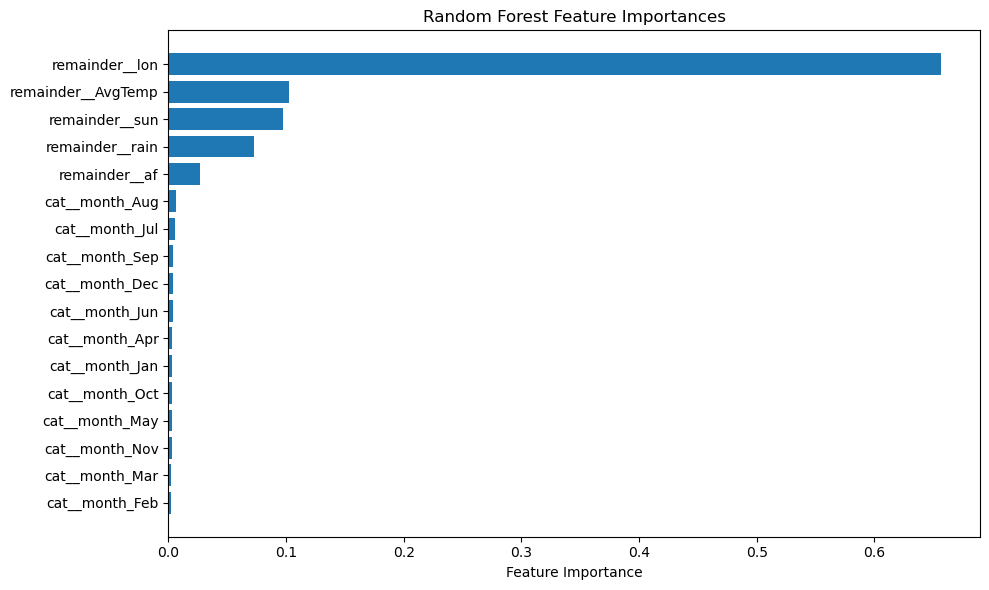

In [88]:

# Make sure your pipeline is already fitted
# clf_pipeline.fit(X_train, y_train)

# Get feature importances
importances = clf_pipeline.named_steps['classifier'].feature_importances_

# Get full feature names after preprocessing
feature_names = clf_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Combine into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.tight_layout()
plt.show()
